In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [116]:
df = pd.read_csv('CarPrice_Assignment.csv')

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [117]:
df = df.drop(columns=['car_ID', 'CarName'], axis=1)

In [118]:
df = pd.get_dummies(df, columns=['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'], drop_first=True, dtype=int)

df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


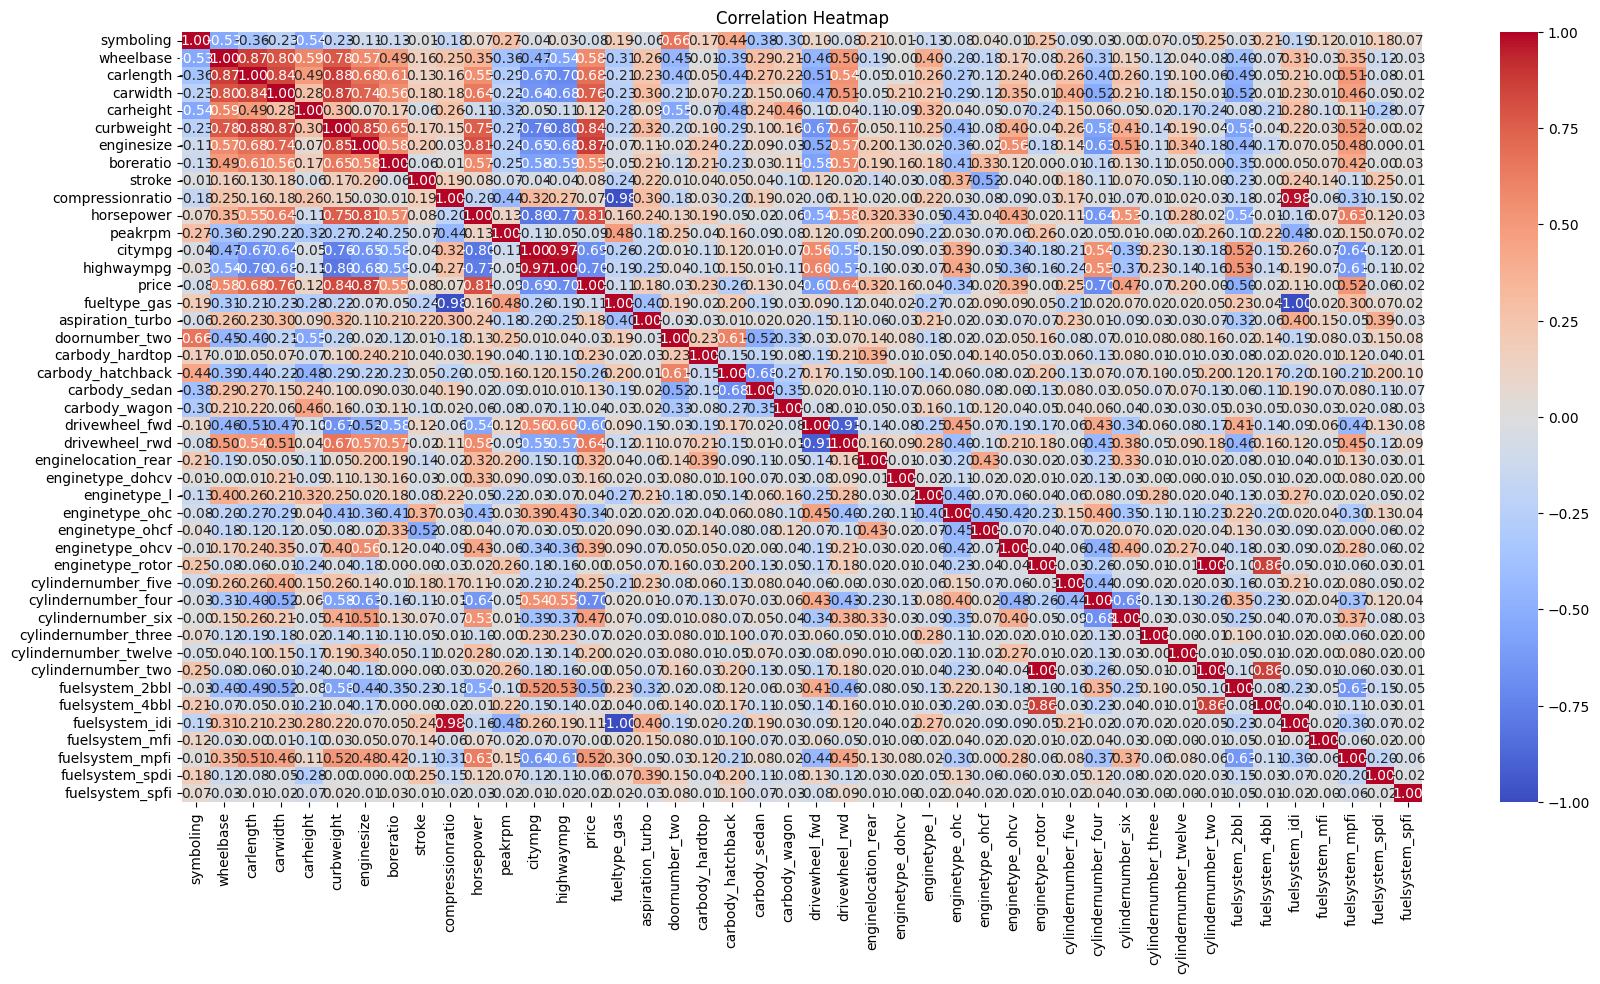

In [119]:
# Heatmap to visualize correlations
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [120]:
features = ['curbweight', 'enginesize', 'horsepower', 'carwidth', 'carlength', 'wheelbase', 'boreratio', 'citympg', 'highwaympg', 'drivewheel_rwd', 'cylindernumber_four', 'fuelsystem_2bbl', 'fuelsystem_mpfi']

df = df[features + ['price']]

In [121]:
df.head()

,curbweight,enginesize,horsepower,carwidth,carlength,wheelbase,boreratio,citympg,highwaympg,drivewheel_rwd,cylindernumber_four,fuelsystem_2bbl,fuelsystem_mpfi,price
0,2548,130,111,64.1,168.8,88.6,3.47,21,27,1,1,0,1,13495.0
1,2548,130,111,64.1,168.8,88.6,3.47,21,27,1,1,0,1,16500.0
2,2823,152,154,65.5,171.2,94.5,2.68,19,26,1,0,0,1,16500.0
3,2337,109,102,66.2,176.6,99.8,3.19,24,30,0,1,0,1,13950.0
4,2824,136,115,66.4,176.6,99.4,3.19,18,22,0,0,0,1,17450.0


In [122]:
# Remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
for feature in features:
    df = remove_outliers(df, feature)
df.reset_index(drop=True, inplace=True)
df.head()

,curbweight,enginesize,horsepower,carwidth,carlength,wheelbase,boreratio,citympg,highwaympg,drivewheel_rwd,cylindernumber_four,fuelsystem_2bbl,fuelsystem_mpfi,price
0,2548,130,111,64.1,168.8,88.6,3.47,21,27,1,1,0,1,13495.0
1,2548,130,111,64.1,168.8,88.6,3.47,21,27,1,1,0,1,16500.0
2,2337,109,102,66.2,176.6,99.8,3.19,24,30,0,1,0,1,13950.0
3,2395,108,101,64.8,176.8,101.2,3.50,23,29,1,1,0,1,16430.0
4,2395,108,101,64.8,176.8,101.2,3.50,23,29,1,1,0,1,16925.0


Epoch [500/5000], Loss: 0.019737
Epoch [1000/5000], Loss: 0.017652
Epoch [1500/5000], Loss: 0.004435
Epoch [2000/5000], Loss: 0.005260
Epoch [2500/5000], Loss: 0.004803
Epoch [3000/5000], Loss: 0.007091
Epoch [3500/5000], Loss: 0.010887
Epoch [4000/5000], Loss: 0.004310
Epoch [4500/5000], Loss: 0.009233
Epoch [5000/5000], Loss: 0.010272
Mean Squared Error: 1643633.38
R^2 Score: 0.7557


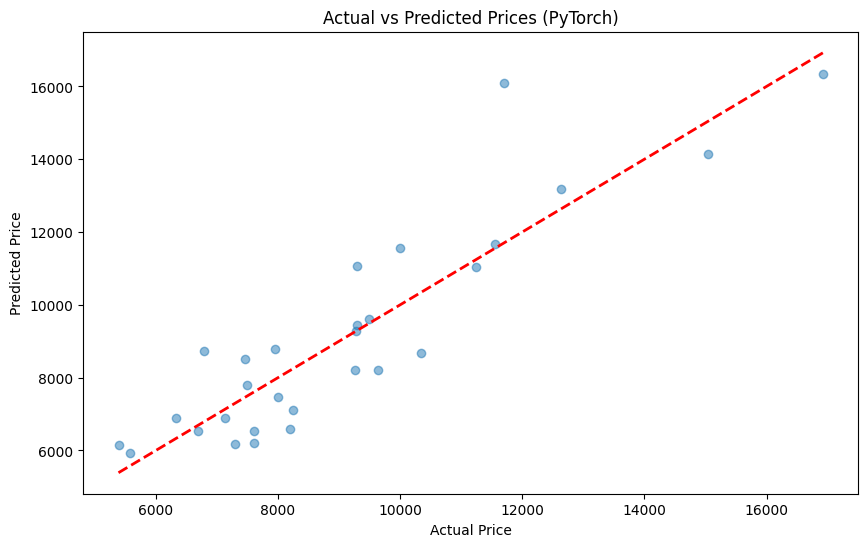

In [123]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# === Data Preparation ===
X = df[features].values
y = df['price'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# === Convert to PyTorch tensors and move to GPU if available ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32).to(device)

# === Define Neural Network ===
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.LeakyReLU(),
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.Linear(64, 32),
            nn.LeakyReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

model = MLP(X_train_tensor.shape[1]).to(device)

# === Training Setup ===
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 5000
batch_size = 64

# === Training Loop ===
for epoch in range(epochs):
    model.train()
    permutation = torch.randperm(X_train_tensor.size()[0])

    for i in range(0, X_train_tensor.size()[0], batch_size):
        indices = permutation[i:i+batch_size]
        batch_X, batch_y = X_train_tensor[indices], y_train_tensor[indices]

        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 500 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")

# === Evaluation ===
model.eval()
with torch.no_grad():
    y_pred_scaled = model(X_test_tensor).cpu().numpy()
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test_tensor.cpu().numpy())

mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.4f}')

# === Plot Actual vs Predicted ===
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (PyTorch)')
plt.show()

In [128]:
train_df = pd.DataFrame(X_train, columns=features)
train_df['price'] = y_train

In [129]:
dfs = np.array_split(train_df, 4)

for i, df_part in enumerate(dfs):
    df_part.to_csv(f'train_split_part_{i+1}.csv', index=False, header=False)

/home/pushkar/.local/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [131]:
import yaml

with open("../final_model.yml", "r") as f:
    data = yaml.safe_load(f)

weights = data['weights']
biases = data['biases']

In [132]:
class CustomMLP(nn.Module):
    def __init__(self, weights, biases):
        super(CustomMLP, self).__init__()
        self.layers = nn.ModuleList()

        for i in range(len(weights)):
            in_features = len(weights[i][0])
            out_features = len(weights[i])
            layer = nn.Linear(in_features, out_features)
            self.layers.append(layer)

        self.activation = nn.LeakyReLU()

        # Set weights and biases manually
        with torch.no_grad():
            for i, layer in enumerate(self.layers):
                layer.weight.copy_(torch.tensor(weights[i]))
                layer.bias.copy_(torch.tensor(biases[i]))

    def forward(self, x):
        for i, layer in enumerate(self.layers):
            x = layer(x)
            if i < len(self.layers) - 1:
                x = self.activation(x)
        return x